In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [3]:
df = pd.read_csv ("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.describe() #shows the statistical summary of the dataset for numerical columns 

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


getting to know categories of each categorical data 

In [17]:
print("categories in gender variable :",end= " ")
print(df.gender.unique())

print("categories in race ethinicty varaible : ", end = "")
print(df.race_ethnicity .unique())

print("categories in parental level of education variable : ", end = "")
print(df.parental_level_of_education.unique())

print("categories in lunch variable : ", end = "")
print(df.lunch.unique())

print("categories in test preparation course variable : ", end = "")
print(df.test_preparation_course.unique())

categories in gender variable : ['female' 'male']
categories in race ethinicty varaible : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable : ['standard' 'free/reduced']
categories in test preparation course variable : ['none' 'completed']


In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

print(' we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print(' we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

 we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
 we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


adding two columns to dataset for total score and average 

In [25]:
df['total-score'] = df[numeric_features].sum(axis=1)
df['average'] = df['total-score'] / len(numeric_features)

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total-score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [42]:
math_full = (df['math_score'] == 100).sum()
reading_full = (df['reading_score'] == 100).sum()
writing_full = (df['writing_score'] == 100).sum()

print("Number of students who scored full marks in math: ", math_full)
print("Number of students who scored full marks in reading: ", reading_full)    
print("Number of students who scored full marks in writing: ", writing_full)

Number of students who scored full marks in math:  7
Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14


In [44]:
reading_less_than20 = (df['reading_score'] < 20).sum()
writing_less_than20 = (df['writing_score'] < 20).sum()
math_less_than20 = (df['math_score'] < 20).sum()

print("Number of students who scored less than 20 in reading: ", reading_less_than20)
print("Number of students who scored less than 20 in writing: ", writing_less_than20)
print("Number of students who scored less than 20 in math: ", math_less_than20)

Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in math:  4


data visualization


<Axes: xlabel='average', ylabel='Count'>

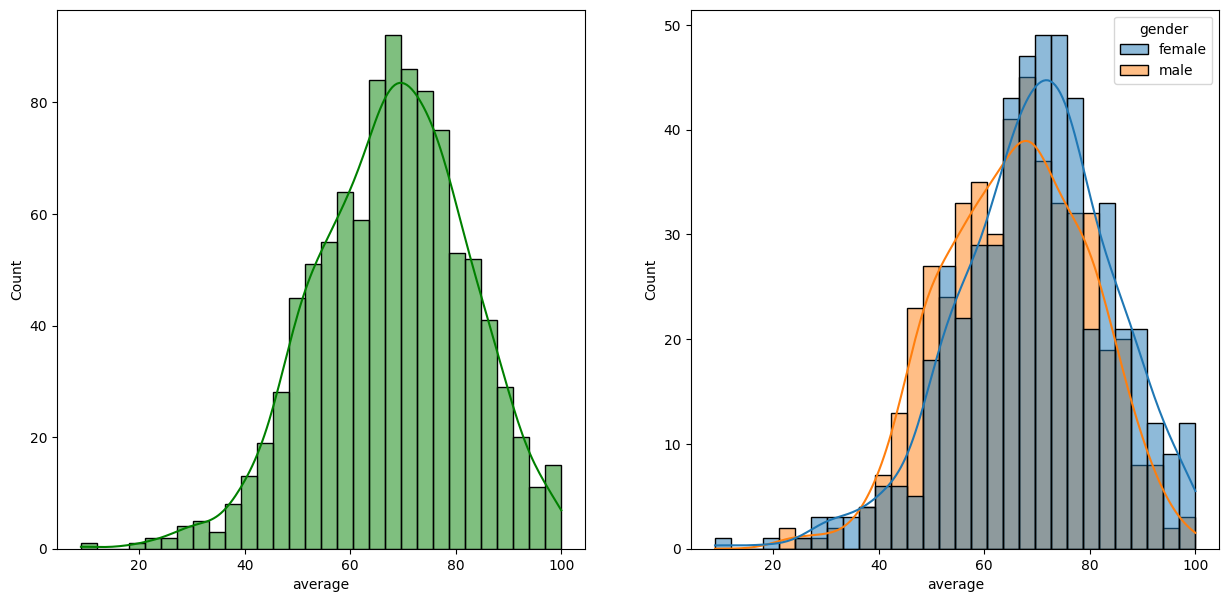

In [51]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average',bins=30,kde='True',color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average',bins=30,kde='True',color='b',hue='gender')

<Axes: xlabel='average', ylabel='Count'>

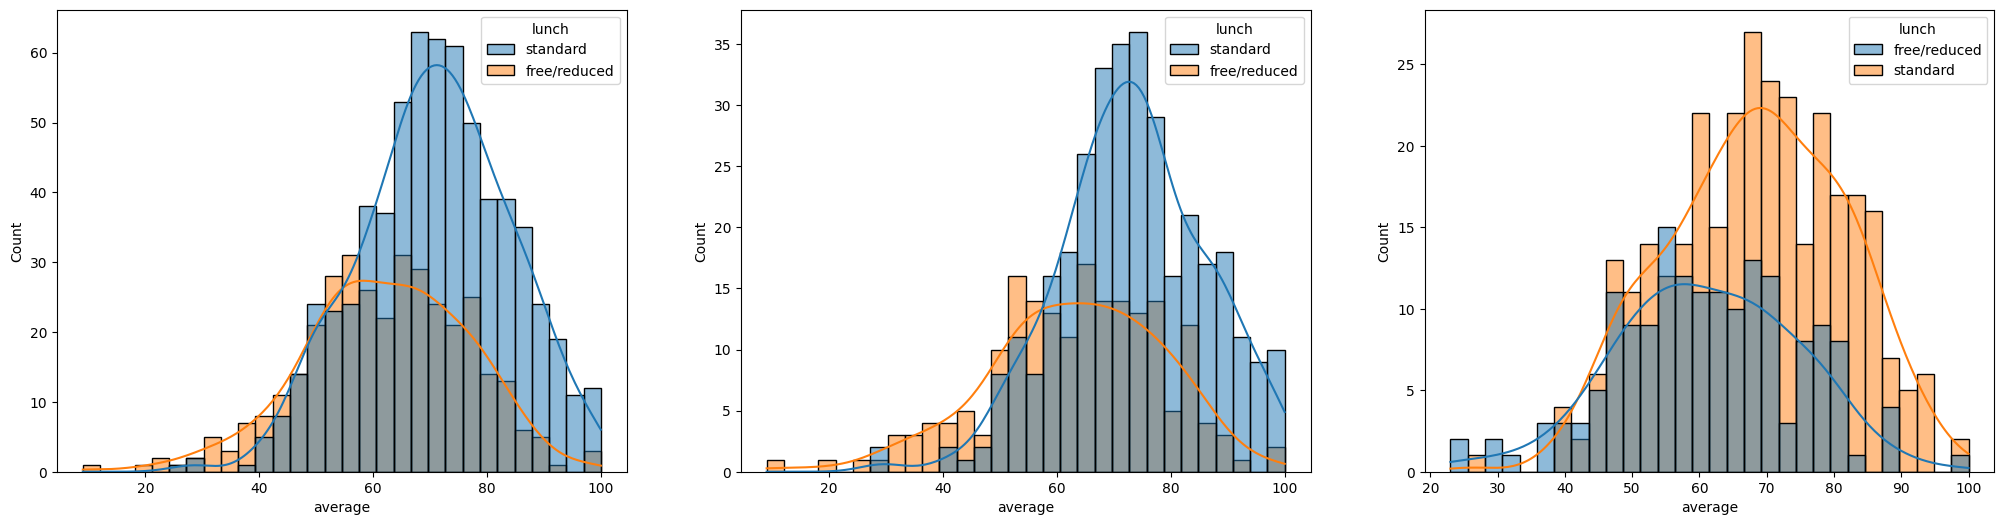

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average',bins=30,kde='True',color='g',hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'], x='average',bins=30,kde='True',color='g',hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'], x='average',bins=30,kde='True',color='g',hue='lunch')



C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\1708076403.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)
C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\1708076403.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,2)
C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\1708076403.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,3)


<Axes: xlabel='average', ylabel='Count'>

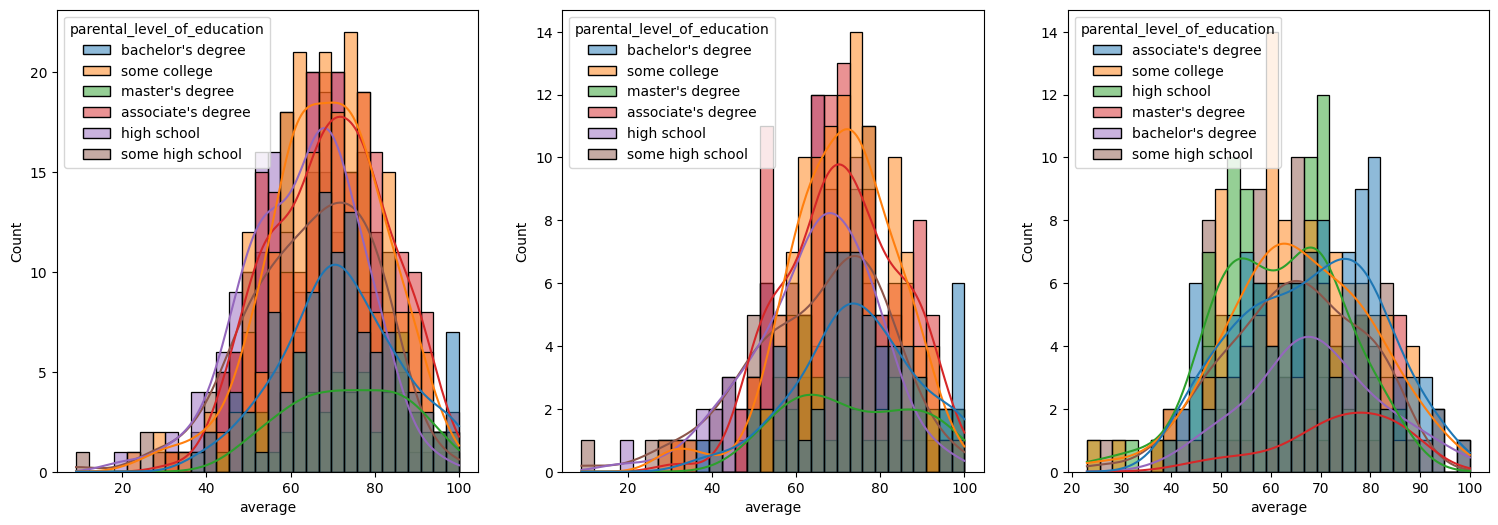

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df, x='average',bins=30,kde='True',color='g',hue='parental_level_of_education')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'], x='average',bins=30,kde='True',color='g',hue='parental_level_of_education')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'], x='average',bins=30,kde='True',color='g',hue='parental_level_of_education')

Insights 
parents education doesnt help student perform well in exam 
2nd one shows that parental education doesnt have much effect on the female students 
3rd graph shows parents who have associate degree or high school tends to perform well 

<Axes: xlabel='average', ylabel='Count'>

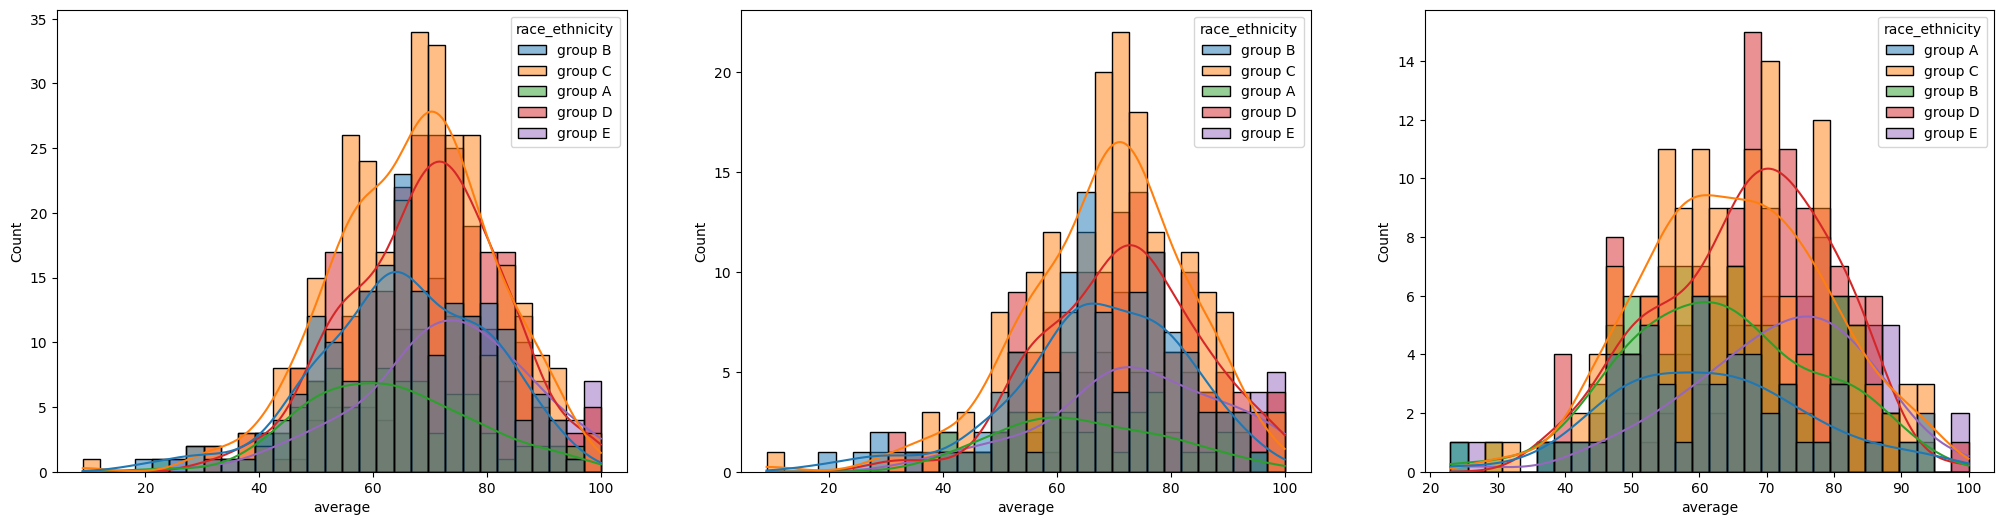

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average',bins=30,kde='True',color='g',hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'], x='average',bins=30,kde='True',color='g',hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'], x='average',bins=30,kde='True',color='g',hue='race_ethnicity')

group a and b perform poorly irrespective of the gender

<Axes: ylabel='writing_score'>

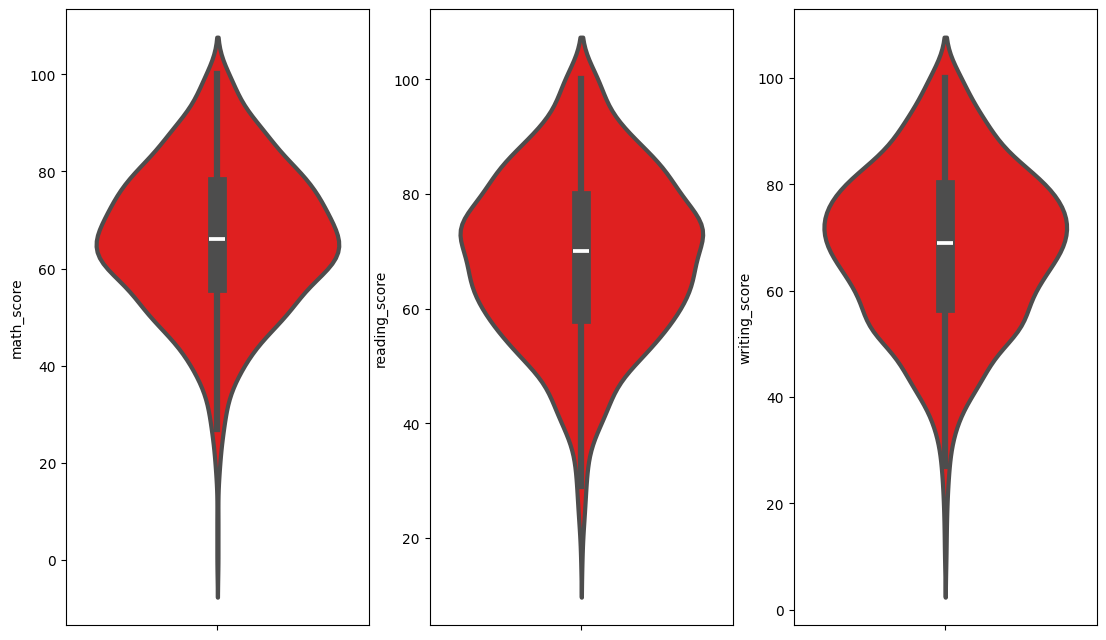

In [63]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
sns.violinplot(data = df, y='math_score',color = 'red',linewidth=3)
plt.subplot(1,4,2)
sns.violinplot(data = df, y='reading_score',color = 'red',linewidth=3)
plt.subplot(1,4,3)
sns.violinplot(data = df, y='writing_score',color = 'red',linewidth=3)

multivariate analysis 

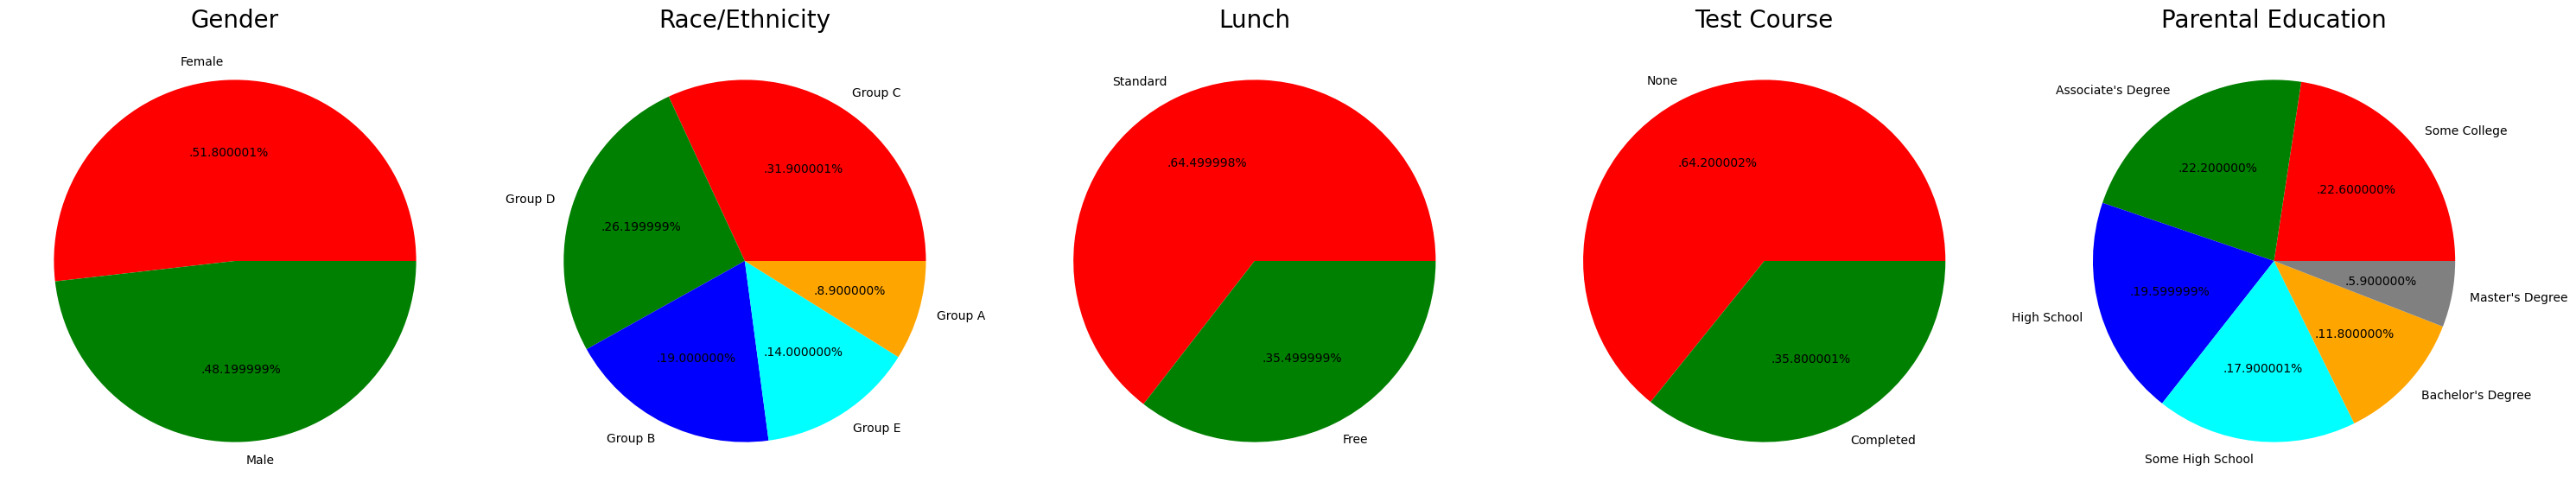

In [68]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


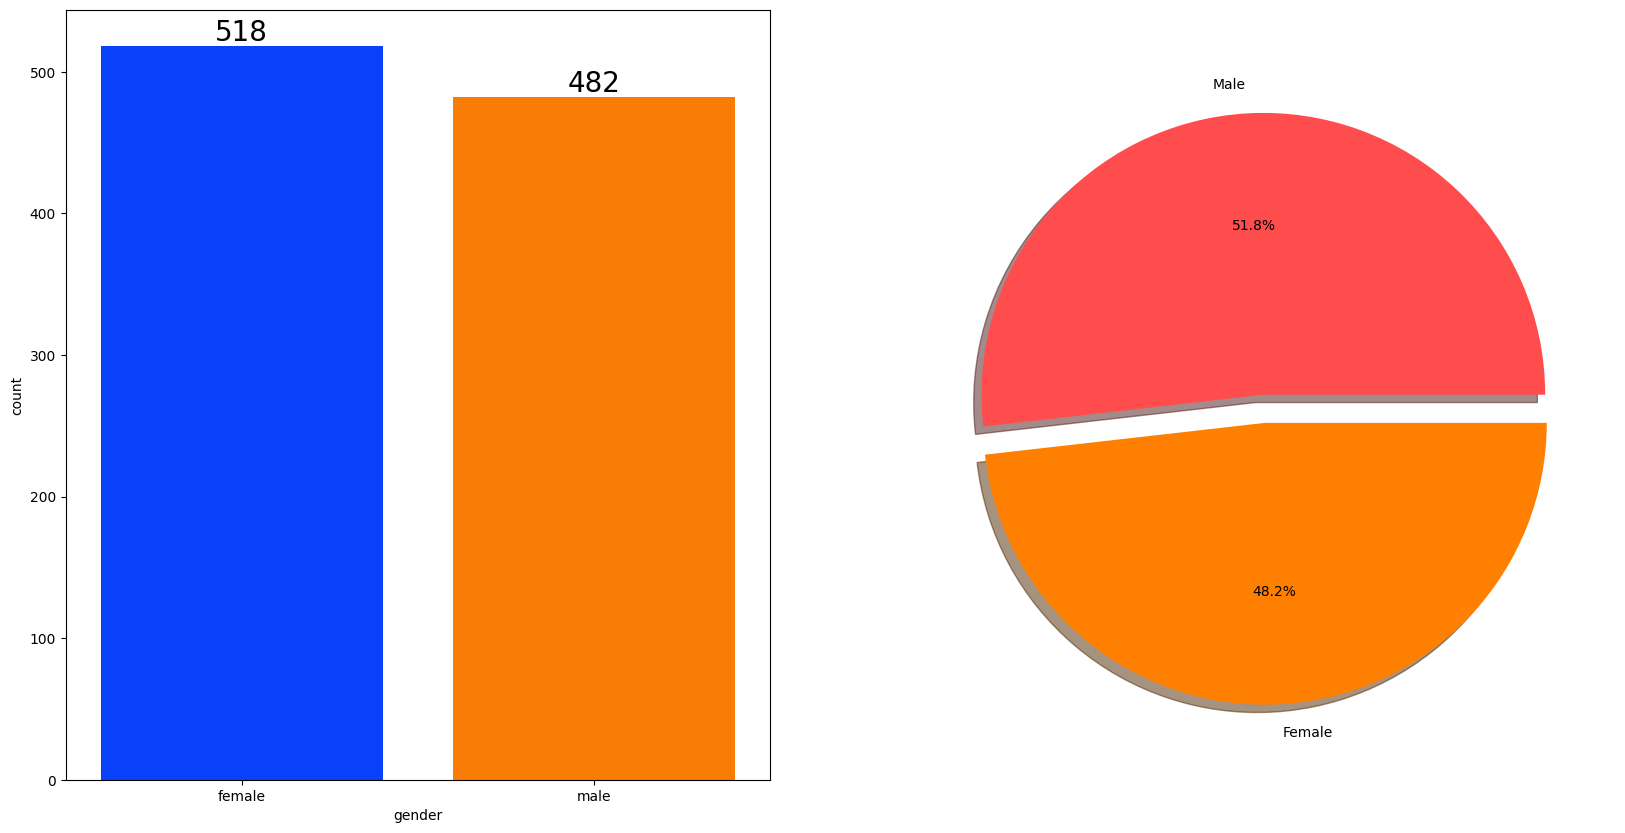

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\3967527147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


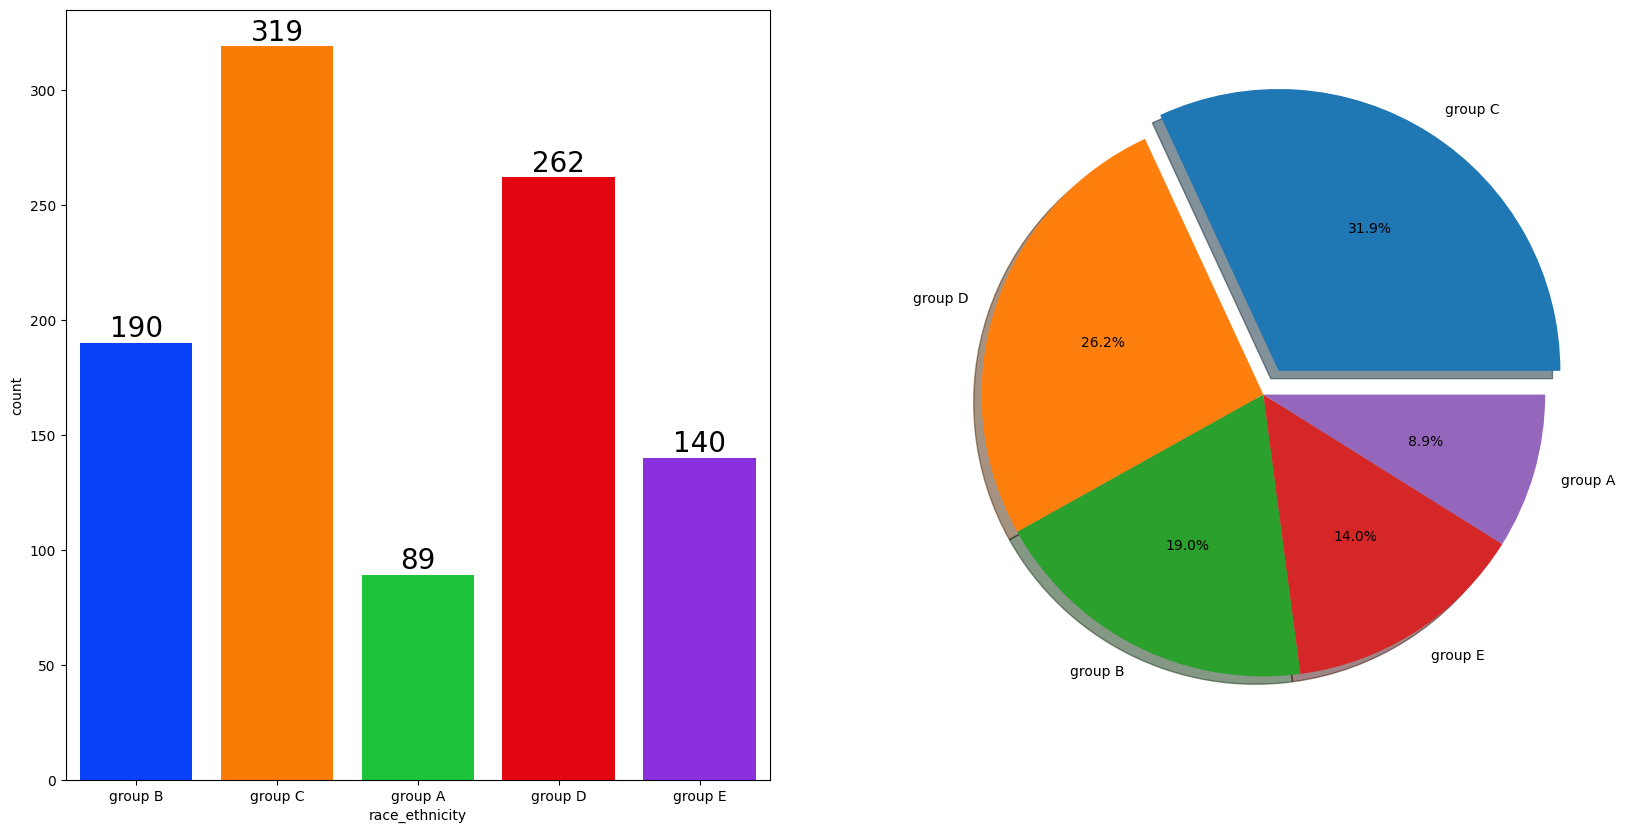

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

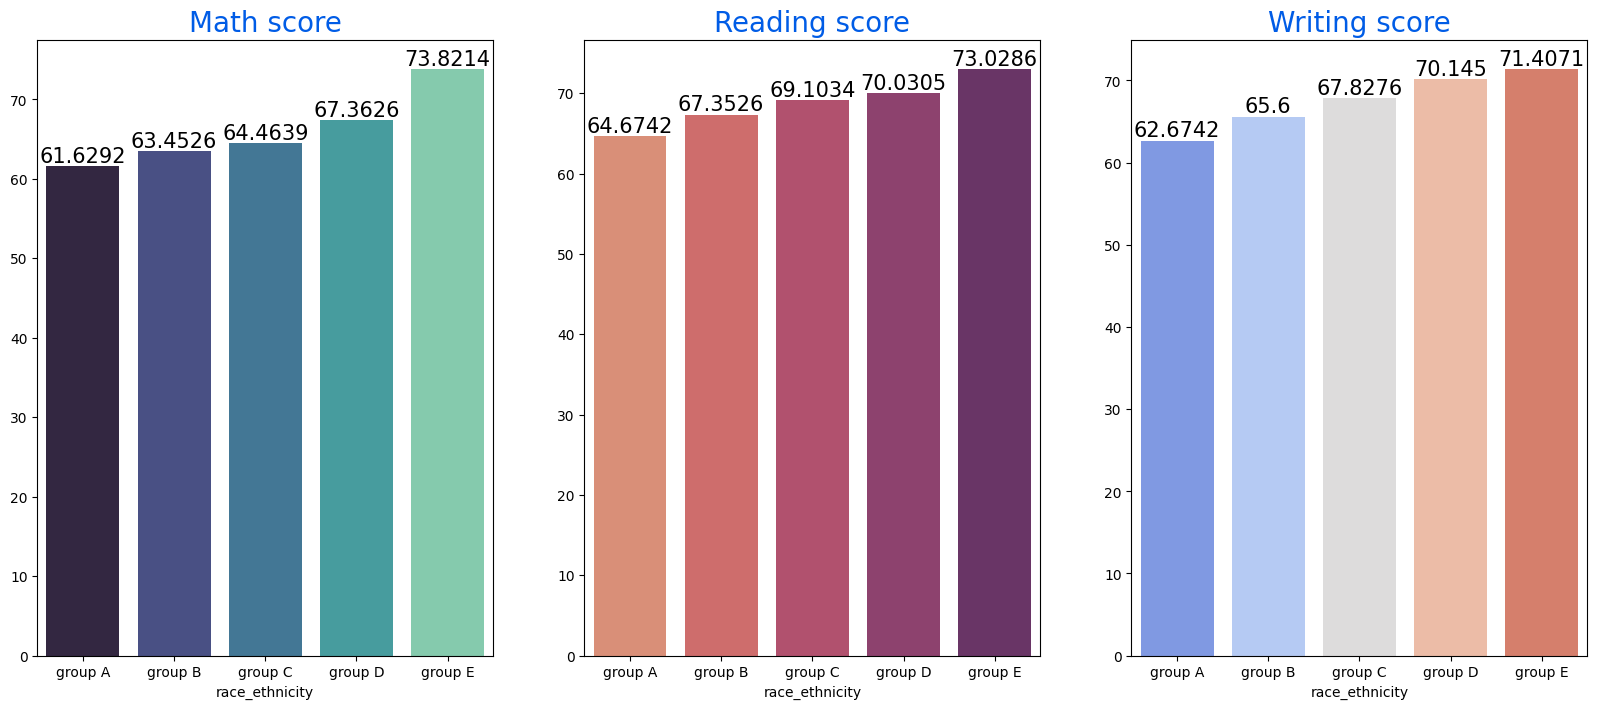

In [80]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\3431367200.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\Adwait\AppData\Local\Temp\ipykernel_11312\3431367200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


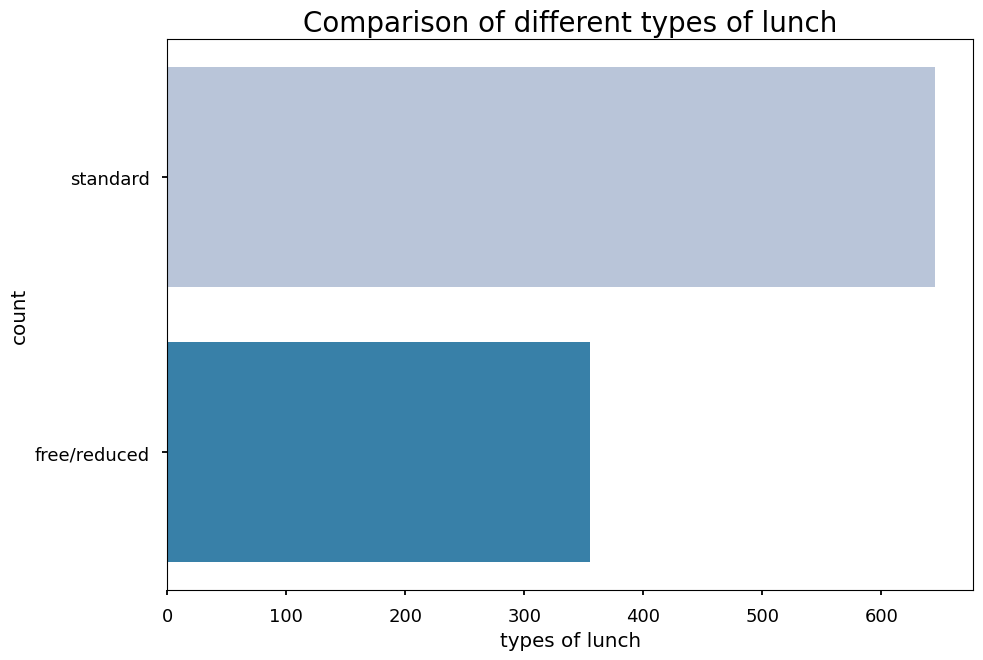

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

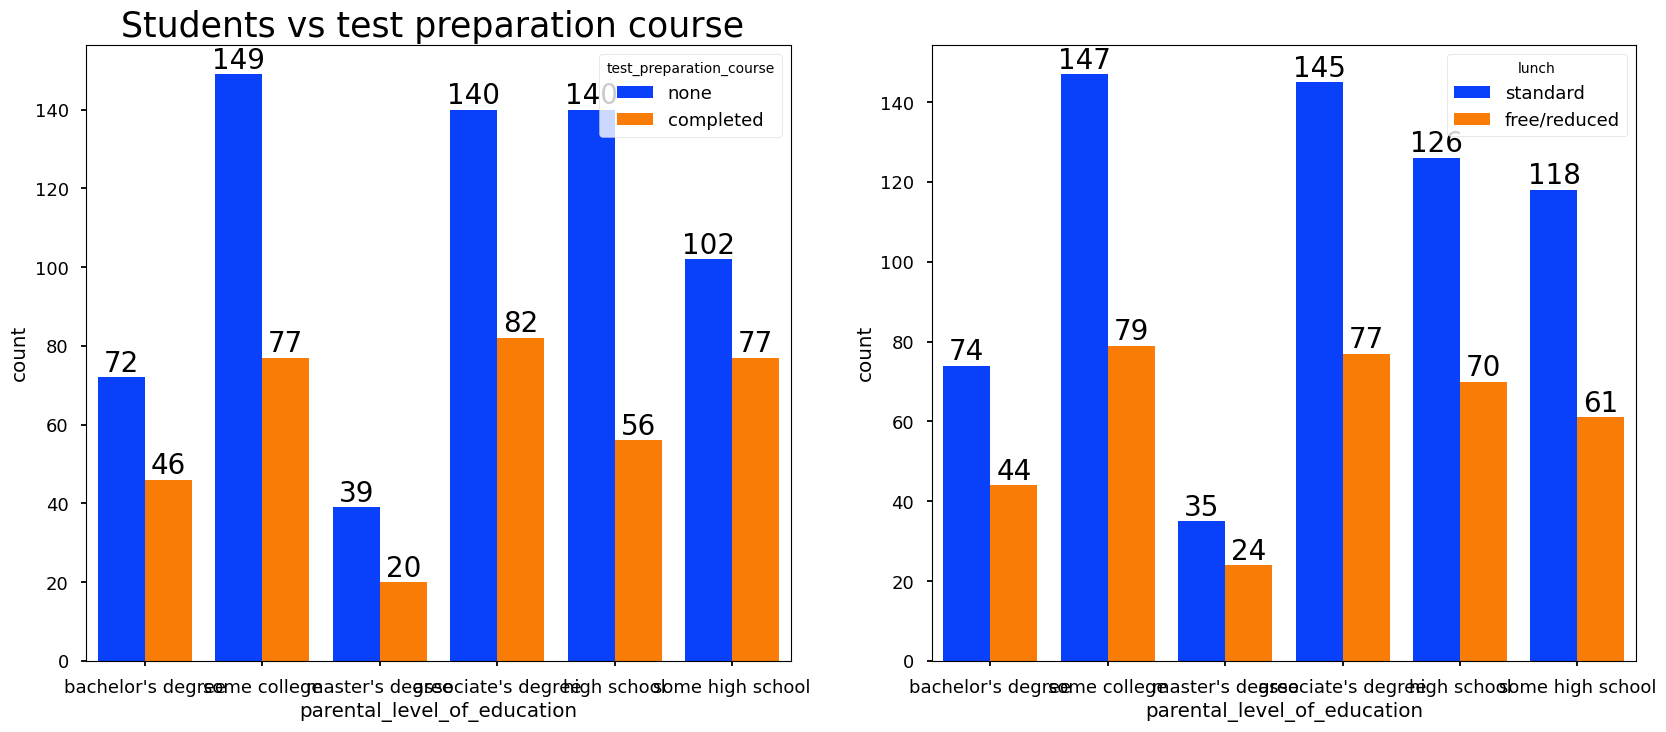

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

students who get standard lunch perfrom better than students who got free / reduced lunch


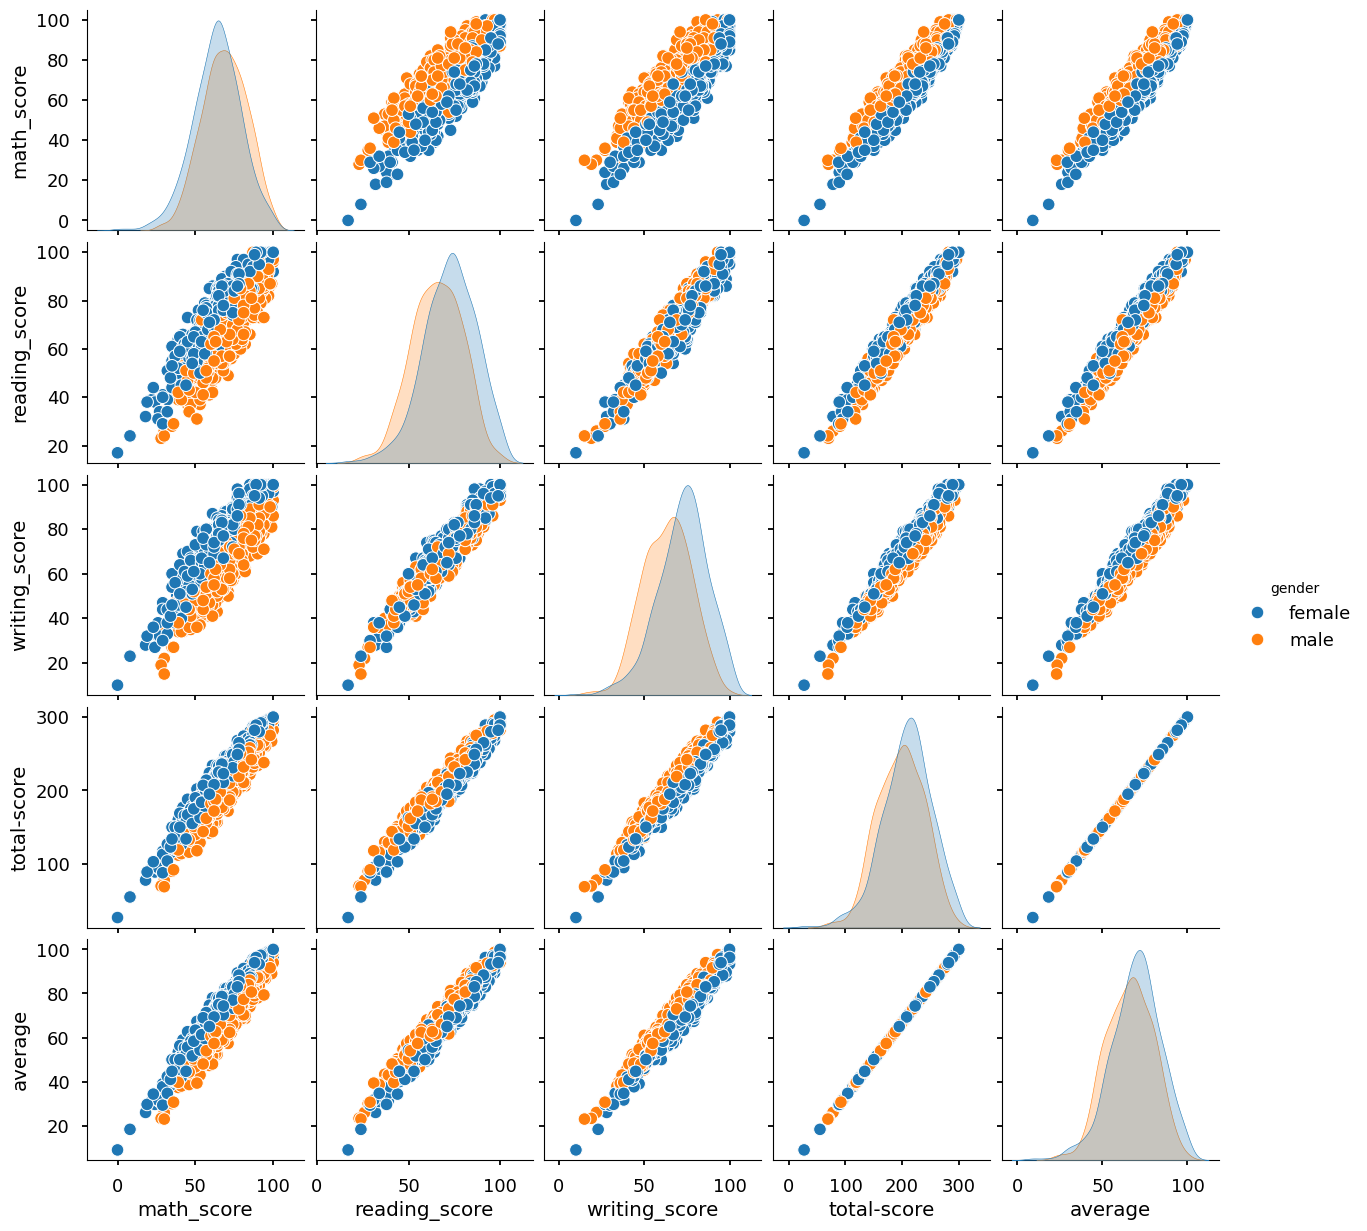

In [85]:
sns.pairplot(df,hue = 'gender')
plt.show()

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.